In [6]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [52]:

path_aliments = 'aliments.csv'
path_traces = 'traces.csv'

aliments = pd.read_csv(path_aliments, delimiter='\t')
traces = pd.read_csv(path_traces, delimiter='\t')

/Users/Wes/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
list_col = aliments.columns.values.tolist()
db_geo = aliments[list_col[:34]]
db_geo.shape

(25372, 34)

In [54]:
db_geo.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr'],
      dtype='object')

In [64]:
db_selected = aliments[aliments['nutrition-score-fr_100g'] < aliments['nutrition-score-fr_100g'].mean()]


In [188]:
db_selected[['countries','countries_fr','product_name','nutrition-score-fr_100g']]

,countries,countries_fr,product_name,nutrition-score-fr_100g
38,France,France,"Pepsi, Nouveau goût !",2.0
53,United Kingdom,Royaume-Uni,British plain flour,-5.0
62,United Kingdom,Royaume-Uni,Brown Rice,-6.0
71,United Kingdom,Royaume-Uni,Lemongrass Paste,-3.0
78,United Kingdom,Royaume-Uni,Italian style babyleaf salad,0.0
79,United Kingdom,Royaume-Uni,Semi skimmed British milk,0.0
82,United Kingdom,Royaume-Uni,Whole British Milk,0.0
88,"France,United Kingdom","France,Royaume-Uni",Lemon & Ginger Chicken Curry,-3.0
94,United Kingdom,Royaume-Uni,Cheesy Pizza,0.0
114,"France,United Kingdom","France,Royaume-Uni",British Maris Piper just bake chips,-4.0


In [189]:

db_bad_nutri_score = db_selected.groupby(['countries_fr'])[['product_name']].count().sort_values(by='product_name', ascending=False)
db_all_nutri_score = aliments.groupby(['countries_fr'])[['product_name']].count().sort_values(by='product_name', ascending=False)

db_bad_nutri_score[:10]

,product_name
countries_fr,
France,4182
Espagne,607
Royaume-Uni,148
Suisse,103
Belgique,87
"France,Europe",84
Portugal,40
Guadeloupe,22
"Suisse,Espagne,République populaire de Chine,Pays-Bas,France,Soudan,Danemark,Japon,Mexique,Allemagne,es:Emiratos-arabes",20


In [190]:
db_bad_nutri_score['ratio'] = db_bad_nutri_score['product_name'] / db_all_nutri_score['product_name']
db_bad_nutri_score = db_bad_nutri_score.dropna().sort_values(by='ratio', ascending=False)

db_to_plot = db_bad_nutri_score[db_bad_nutri_score['product_name'] > 10]
db_to_plot

,product_name,ratio
countries_fr,,
"Espagne,es:Europe",11,0.423077
"France,Europe",84,0.294737
Espagne,607,0.286456
Suisse,103,0.260759
Guadeloupe,22,0.255814
Royaume-Uni,148,0.248322
France,4182,0.245668
"Suisse,Espagne,République populaire de Chine,Pays-Bas,France,Soudan,Danemark,Japon,Mexique,Allemagne,es:Emiratos-arabes",20,0.224719
Portugal,40,0.194175


In [191]:
db_to_plot['ratio'].values.tolist()

[0.4230769230769231,
 0.29473684210526313,
 0.2864558754129306,
 0.2607594936708861,
 0.2558139534883721,
 0.2483221476510067,
 0.24566762615285204,
 0.2247191011235955,
 0.1941747572815534,
 0.1917808219178082,
 0.1917808219178082,
 0.15398230088495576,
 0.08695652173913043,
 0.05701754385964912]

/Users/Wes/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


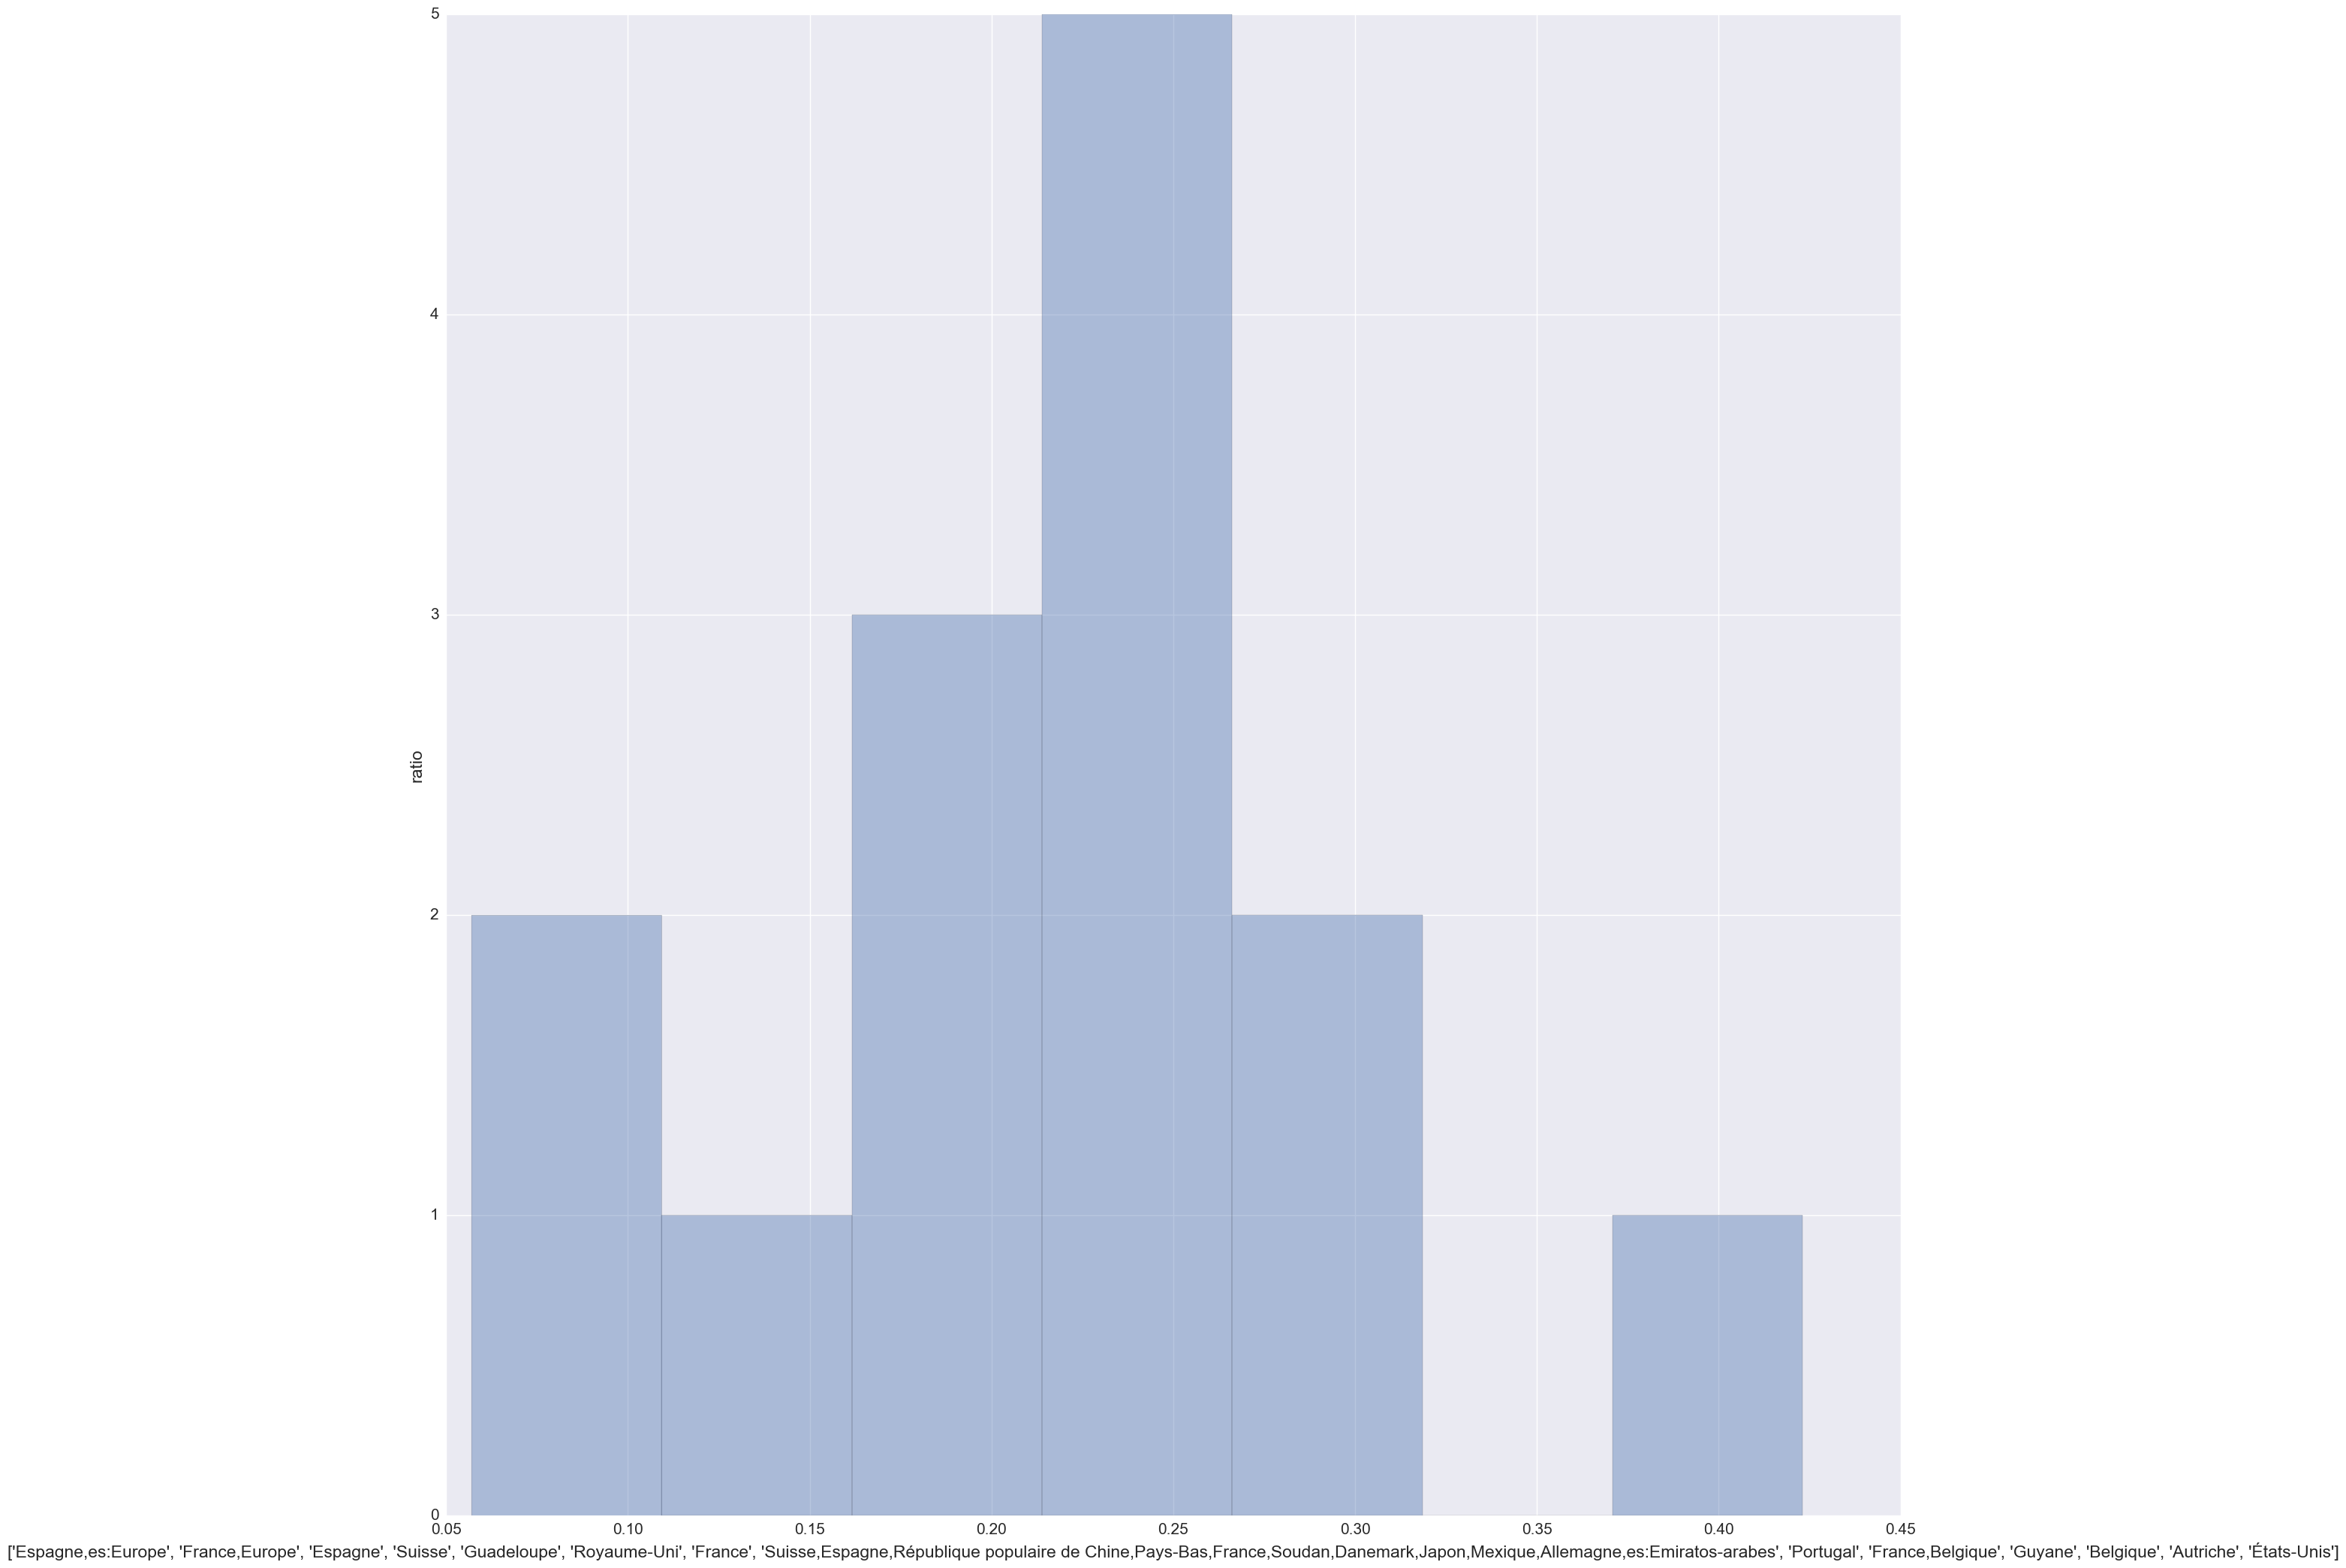

In [211]:
fig, ax = plt.subplots(figsize=(25,25),sharey=True)
sns.despine(left=True)
sns.color_palette("Set2", 30)
sns.set(color_codes=True)

f = sns.distplot(db_to_plot['ratio'], kde=False)
ax.set(xlabel=db_to_plot.index.tolist(), ylabel='ratio')
f.legend()

In [236]:
liste = aliments[list_col[35:]].columns.values.tolist()
x=[]
x.append('countries_fr')
for s in liste :
    if "vitamin" in s :
        x.append(s)

db_nutri = aliments[x]
db_nutri[db_nutri[['countries_fr'] in db_to_plot.index.tolist()]]

KeyError: False

In [234]:
#dat = df[['num_spec', 'DEPASSEMENT MOYEN (euros)', 'DEPASSEMENTS (euros)', 'NOMBRE DE DEPASSEMENTS','EFFECTIFS']]
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
scatter_matrix(db_nutri, diagonal='kde',figsize=(15,13))
plt.show()

NameError: name 'scatter_matrix' is not defined